In [43]:
import cv2
import matplotlib.pyplot as plt

In [62]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
data_set ='frozen_inference_graph.pb'
# data_set1 ='resnet50_coco_best_v2.1.0.h5'

In [66]:
model = cv2.dnn_DetectionModel(data_set,config_file)

In [67]:
classlabals =[]
file_name ="Labels.txt"
with open(file_name,'rt') as fpt:
    classlabals =fpt.read().rstrip('\n').split('\n')
    

In [68]:
print(classslabals)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [69]:
print(len(classlabals))



80


In [70]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000021D5A46FE70>

# read an image 

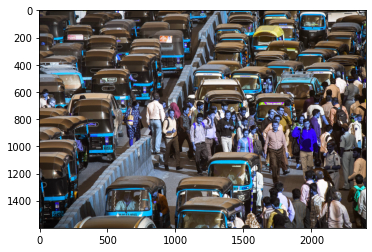

In [71]:
img = cv2.imread('test.jpg')
plt.imshow(img)

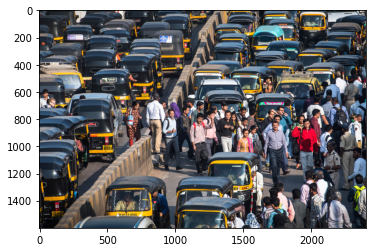

In [72]:
plt.imshow(cv2.cvtColor( img, cv2.COLOR_BGR2RGB))

In [73]:
ClassIndex,confidece,bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[[1]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [6]
 [6]
 [6]
 [6]
 [8]]


In [74]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,cof,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabals[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

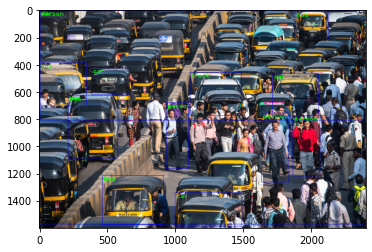

In [75]:
plt.imshow(cv2.cvtColor( img, cv2.COLOR_BGR2RGB))